In [114]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)

#앙상블
from sklearn.ensemble import VotingClassifier

#이거 임포트 해줘야 차트에서 오류안남!!! 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
#font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [115]:
##estimator,model,알고리즘,classifier..같은 말

In [116]:
mnist = datasets.load_digits()

In [117]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [118]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [119]:
features, labels = mnist.data, mnist.target

In [120]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [121]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [122]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [123]:
X_test.shape, y_test.shape

((360, 64), (360,))

In [124]:
#single model
#각 모델의 객체 생성

In [135]:
dtree = DecisionTreeClassifier(
#하이퍼파라메터를 넣어보자.
    criterion='entropy',
    max_depth=20,
    random_state=35
)

In [136]:
knn = KNeighborsClassifier(
    n_neighbors=299,
    n_jobs=None#CPU수.None=있는거 다 쓰기.
)

In [150]:
svm = SVC(
    C=0.1,
    gamma=0.003,#곡선의 휘어진 정도
    kernel='rbf',#직선,곡선 중 택1 각각의 하이퍼파라메터가 다르다.rbf=곡선,linear=직선
    probability=True#각 라벨링 값으로 될 가능성 구해주세요!
)

In [151]:
dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

In [152]:
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

In [153]:
svm.fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [154]:
print('accuracy=======================================')
print('dtree>> ',accuracy_score(y_test, dtree_predicted))
print('knn>> ',accuracy_score(y_test, knn_predicted))
print('svm>> ',accuracy_score(y_test, svm_predicted))

accuracy=======================================
dtree>>  0.8722222222222222
knn>>  0.825
svm>>  0.9027777777777778


In [161]:
dtree_proba = dtree.predict_proba(X_test)
dtree_proba[:1]
#첫번째 숫자가 1일확률 100프로

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [162]:
knn_proba = knn.predict_proba(X_test)
knn_proba[:1]#첫번째 숫자가 1일확률이 가장 큼

array([[0.        , 0.35785953, 0.14715719, 0.05685619, 0.06020067,
        0.02675585, 0.04682274, 0.09364548, 0.20735786, 0.00334448]])

In [163]:
svm_proba = svm.predict_proba(X_test)
svm_proba[:1]#첫번째 숫자가 1일확률이 가장 큼(리스트 안에 0,1,2,...번째 순서로 되어있음 1번째 값이 가장 큼)

array([[2.28262096e-04, 9.95983674e-01, 3.15244164e-04, 5.71941394e-05,
        5.12774303e-05, 3.12465856e-05, 7.43734624e-05, 2.29213000e-04,
        2.96620991e-03, 6.33053687e-05]])

In [168]:
#몇번째 숫자가 가장 큰지 찾아주는 함수
np.argmax(knn_proba[:1])#첫번째 숫자가 1일확률이 가장 큼

1

In [171]:
np.argmax(dtree_proba[:1]),np.argmin(dtree_proba[:1])#첫번째 숫자가 1일확률이 가장 큼,0번째 수가 가장 작음

(1, 0)

In [170]:
np.argmax(knn_proba[:1]),np.argmin(knn_proba[:1])#첫번째 숫자가 1일확률이 가장 큼,0번째 수가 가장 작음

(1, 0)

In [172]:
np.argmax(svm_proba[:1]),np.argmin(svm_proba[:1])#첫번째 숫자가 1일확률이 가장 큼,5번째 수가 가장 작음

(1, 5)

In [ ]:
#10번째까지로 늘려보자.

In [174]:
dtree_proba = dtree.predict_proba(X_test)
dtree_proba[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [176]:
knn_proba = knn.predict_proba(X_test)
knn_proba[:10]

array([[0.        , 0.35785953, 0.14715719, 0.05685619, 0.06020067,
        0.02675585, 0.04682274, 0.09364548, 0.20735786, 0.00334448],
       [0.44481605, 0.        , 0.00334448, 0.11371237, 0.        ,
        0.17725753, 0.05351171, 0.        , 0.03010033, 0.17725753],
       [0.00668896, 0.24414716, 0.37458194, 0.13377926, 0.01003344,
        0.04682274, 0.03010033, 0.00668896, 0.090301  , 0.05685619],
       [0.14715719, 0.06354515, 0.00668896, 0.02675585, 0.04682274,
        0.05351171, 0.45819398, 0.        , 0.1270903 , 0.07023411],
       [0.        , 0.22408027, 0.2909699 , 0.13043478, 0.        ,
        0.00334448, 0.09364548, 0.02006689, 0.22408027, 0.01337793],
       [0.00334448, 0.        , 0.13043478, 0.21404682, 0.        ,
        0.12040134, 0.11036789, 0.        , 0.27424749, 0.14715719],
       [0.02006689, 0.18729097, 0.00668896, 0.02006689, 0.42140468,
        0.01672241, 0.17725753, 0.05351171, 0.06354515, 0.03344482],
       [0.13712375, 0.        , 0.0301003

In [177]:
svm_proba = svm.predict_proba(X_test)
svm_proba[:10]

array([[2.28262096e-04, 9.95983674e-01, 3.15244164e-04, 5.71941394e-05,
        5.12774303e-05, 3.12465856e-05, 7.43734624e-05, 2.29213000e-04,
        2.96620991e-03, 6.33053687e-05],
       [8.58845295e-01, 1.30070168e-02, 2.10991490e-02, 1.26617363e-02,
        8.67123016e-03, 1.85058882e-02, 7.32263353e-03, 1.28808383e-02,
        2.60261735e-02, 2.09800394e-02],
       [2.92851858e-03, 7.79629935e-03, 9.42599949e-01, 3.49237773e-03,
        3.13384914e-03, 2.53710100e-03, 3.21695084e-03, 5.59312766e-03,
        2.47792870e-02, 3.92253926e-03],
       [4.08552548e-04, 1.28202203e-04, 2.01024378e-04, 1.24776719e-04,
        1.11272748e-04, 1.31216768e-04, 9.98355823e-01, 1.77375409e-04,
        2.10917883e-04, 1.50838106e-04],
       [2.57633679e-03, 5.13640141e-03, 9.53089455e-01, 2.34044473e-03,
        2.57277735e-03, 1.90590141e-03, 2.60572828e-03, 4.69549505e-03,
        2.22243357e-02, 2.85312392e-03],
       [3.12733359e-03, 9.62403943e-03, 1.71313116e-02, 1.15829572e-02,
   

In [ ]:
#argmax,argmin을 각 모델마다 어떻게 나오는지 비교해보자.

In [175]:
np.argmax(dtree_proba[:10]),np.argmin(dtree_proba[:10])

(1, 0)

In [179]:
np.argmax(knn_proba[:1]),np.argmin(knn_proba[:1])#첫번째 숫자가 1일확률이 가장 큼,0번째 수가 가장 작음

(1, 0)

In [178]:
np.argmax(svm_proba[:1]),np.argmin(svm_proba[:1])#첫번째 숫자가 1일확률이 가장 큼,5번째 수가 가장 작음

(1, 5)

In [164]:
####앙상블 모델

In [165]:
##하드 보팅
voting_clf1 = VotingClassifier(
    estimators=[('decision tree', dtree),('knn',knn),('svm',svm)],
    weights=[1,1,1],
    voting='hard'
)

In [180]:
voting_clf1.fit(X_train, y_train)#fitting하고 accuracy를 확인해보자!
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9277777777777778

In [187]:
hard_voting_predicted[[0,10]]
#dtree: 1, knn: 1, svm:0 ==> 이런식으로 다수결의 원칙에 따라 1으로 판단

array([1, 9])

In [166]:
##소프트 보팅
voting_clf2 = VotingClassifier(
    estimators=[('decision tree', dtree),('knn',knn),('svm',svm)],
    weights=[1,1,1],
    voting='soft'
)

In [184]:
voting_clf2.fit(X_train, y_train)#fitting하고 accuracy를 확인해보자!
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.8972222222222223

In [185]:
#그래프로 그려보세요. accuracy(dtree, knn, svn, hard voting, soft voting)

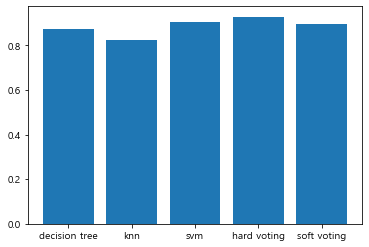

In [190]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                   accuracy_score(y_test, knn_predicted),
                   accuracy_score(y_test, svm_predicted),
                   accuracy_score(y_test, hard_voting_predicted),
                   accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);
